## Исследование данных о российском кинопрокате



- Заказчик этого исследования — Министерство культуры Российской Федерации. Нужно изучить рынок российского кинопроката и выявить текущие тренды.  

- Работать будем с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

- Цель исследования - изучить рынок российского кинопроката и выявить текущие тренды. Определить интерес зрителя к фильмам, получившим гос. поддержку.

- Работать будем с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

- План работы: Шаг 1. Открыть файлы с данными и объедините их в один датафрейм. Шаг 2. Предобработка данных. Шаг 3. Провести исследовательский анализ данных. Шаг 4. Исследовать фильмы, которые получили государственную поддержку. Шаг 5. Написать общий вывод.

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
shows = pd.read_csv('/datasets/mkrf_shows.csv')
movies = pd.read_csv('/datasets/mkrf_movies.csv')


In [3]:
movies.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
shows.head(15)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [6]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce').fillna(0).astype('Int64')

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: I

In [9]:
movies['puNumber']

0       221048915
1       111013716
2       221038416
3       221026916
4       221030815
          ...    
7481    126008019
7482    121037819
7483    124010819
7484    124010619
7485    124010719
Name: puNumber, Length: 7486, dtype: Int64

Нужно было преобразовать столбец PuNumber в int, чтобы объединить эти две таблицы.

In [10]:
data = movies.merge(shows, on='puNumber', how='left')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таблицы объединены, можно приступать к предобработке. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Мы уже изменили тип столбца puNumber на int, кроме него можно ещё изменить тип столбца raiting на float, чтобы в дальнейшем можно было проводить с ним математические операции. Также можно заменить тип столбца show_start_date на тип datetime.  

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [16]:
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   Int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Замена прошла корректно.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [18]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

# Вывод                     
- puNumber                    0 - Пропуски отсутствуют
- show_start_date             0 - Пропуски отсутствуют
- type                        0 - Пропуски отсутствуют
- film_studio                18 - Пропусков достаточно мало, а придумать им замену не представляется возможным, оставим.
- production_country          2 - Пропусков слишком мало, оставляем.
- director                    9 - Пропусков слишком мало, оставим.
- producer                  568 - Пропусков менее 8%, можно оставить.
- age_restriction             0 - Пропуски отсутствуют.
- Пропущена значительная часть данный в refundable_support, nonrefundable_support, budget, financing_source. Но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;
- ratings                   996 - Оставим
- genres                    976 - Оставим
- box_office               4328 - Недостаточно данных для заполнения

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [19]:
data.duplicated().sum()

0

In [110]:
data['puNumber'].duplicated().sum()

2

In [111]:
data['title'].duplicated().sum()

714

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [20]:
data[(data['title'].duplicated(keep=False)) & (data['box_office'].isna() == False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.00,"фэнтези,приключения,семейный","1,093,810.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
114,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,948,760.00"
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"фэнтези,приключения,семейный","843,310.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,Дитя тьмы,121010819,2019-05-23 12:00:00+00:00,Художественный,Брокен Миррор Фильм,Канада,Джереми Люттер,"Джереми Люттер, Жослин Расселл, Робин Чан",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.90,"ужасы,триллер,детектив","2,276,644.94"
7281,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,драма,"2,617,932.50"
7289,Игра с огнем,121029319,2019-10-10 12:00:00+00:00,Художественный,"Йал Продакшнз, Хопскоч Пикчерз, Фильм Моуд Инт...",США,Майк Ган,"Джордан Бекман, Суки Чю",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.60,триллер,"281,077.00"
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,"5,000,000.00","20,000,000.00","75,000,000.00",Фонд кино,7.80,драма,"3,181,218.00"


In [21]:
data.loc[110, 'title']

'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/'

In [22]:
data[data['title'] == 'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
109,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221004916,2016-02-09 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
4427,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221134510,2010-11-29 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный",NaN


Получается, что есть одни и те же картины, которые выходили в прокат неоднократно, поэтому у них разные номера прокатных удостоверений.

In [23]:
data['puNumber'].duplicated().sum()

2

In [24]:
data[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [25]:
data[data['title'] == data.loc[4638, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN


In [26]:
data[data['title'] == data.loc[4639, 'title']]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
4513,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


In [27]:
data[data['title'] == data.loc[5067, 'title']]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN


In [28]:
data[data['title'] == data.loc[5068, 'title']]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


В поле type есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод .str.strip. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:
data['type'].str.strip()

Во всех категориальных переменных значения разделены запятыми без пробелов (столбец с жанрами), для стран в качестве разделителя "-". Будем иметь это ввиду.

In [29]:
data['type'] = data['type'].str.strip()

In [30]:
# Код ревьюера
data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [31]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [32]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [33]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [34]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [35]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

# Вывод

Полностью повторяющих строк нет. Есть дубли в названиях фильмов, это связано с неоднократной выдачей прокатных удостоверений. Исправить это не можем, так как в этом случае утеряется номер прокатного удостоверения. Есть дубли в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Может, эти фильмы "крутились" подряд. По крайней мере в реестре на официальном сайте так все и есть: под одним номером - два фильма.
В столбце type были лишние пробелы, исправили это. Почти во всех категориальных переменных есть повторяющиеся значения в совокупности с другими. Например: "драма,триллер", "драма,военный". Это не можем исправить.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [36]:
data.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [37]:
data.columns


Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [38]:
groups = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']

In [39]:
data[groups].describe()


,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.00,332.00,332.00,"3,158.00","6,490.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16",6.48
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82",1.10
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,"25,000,000.00","42,000,000.00","86,239.00",5.90
50%,0.00,"30,000,000.00","68,649,916.00","2,327,987.55",6.60
75%,"15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02",7.20
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79",9.20


Видим, что есть фильмы с нулевым бюджетом, посмотрим такие значения

In [40]:
data[data['budget'] == 0].describe()


,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.00,17.00,17.00,17.00,16.00,17.00
mean,"112,067,204.47","16,705,882.35","65,174,674.41",0.00,5.72,"163,137,294.43"
std,"1,473,501.27","20,064,784.78","61,236,204.09",0.00,0.92,"251,115,991.43"
min,"111,000,415.00",0.00,0.00,0.00,4.30,"1,334,699.40"
25%,"111,009,615.00",0.00,"23,000,000.00",0.00,5.07,"50,451,949.00"
50%,"111,017,315.00","10,000,000.00","51,000,000.00",0.00,5.70,"72,937,783.20"
75%,"114,001,715.00","20,000,000.00","75,000,000.00",0.00,6.30,"184,487,551.40"
max,"114,006,518.00","60,000,000.00","250,000,000.00",0.00,7.80,"1,038,321,489.00"


Несмотря на то, что у этих фильмов нулевой бюджет, есть такие фильмы, где сумма поддержки ненулевая. В этом случае бюджет не может быть меньше суммы поддержки. Проверим кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств.

In [41]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Такие картины есть. Исправим в них бюджет на сумму поддержки. Для этого напишем функцию.



In [42]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [43]:
data['budget_corrected'] = data.apply(correct_budget, axis=1)


In [44]:
data.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_corrected
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN


In [45]:
data.describe()


,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,budget_corrected
count,"7,486.00",332.00,332.00,332.00,"6,490.00","3,158.00",332.00
mean,"135,178,527.64","11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16","131,422,395.80"
std,"38,382,177.41","24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82","187,148,242.67"
min,0.00,0.00,0.00,0.00,1.00,0.00,"6,000,000.00"
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00","45,524,799.50"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55","71,196,901.50"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02","150,000,000.00"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79","2,305,074,303.00"


суммы кол-ва строк совпали

Посмотрим, есть ли еще такие строки

In [46]:
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget_corrected']])

0

In [47]:
data['budget'] = data['budget_corrected']


In [48]:
del data['budget_corrected']


In [49]:
data.columns


Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

# Вывод
Заменили нулевые значения бюджета, где сумма поддержки превышала значение бюджета.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Несмотря на то, что у этих фильмов нулевой бюджет, есть такие фильмы, где сумма поддержки ненулевая. В этом случае бюджет не может быть меньше суммы поддержки. Проверим кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств.

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [50]:
data['show_start_year'] = data['show_start_date'].dt.year

In [51]:
data.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


In [52]:
data['show_start_year'].value_counts()


2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

In [53]:
data['director_first'] =data ['director'].str.split(",").str[0]
data['genre_first'] = data['genres'].str.split(",").str[0]
data['director_first'] = data['director_first'].str.strip()
data['genre_first'] = data['genre_first'].str.strip()

In [54]:
data.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


In [55]:
# Код ревьюера
data[['director_first', 'genre_first', 'director', 'genres']].sample(10)

,director_first,genre_first,director,genres
2924,Питер Соллетт,драма,Питер Соллетт,драма
6170,М.Мошкова,NaN,М.Мошкова,NaN
4128,Деон Тейлор,ужасы,Деон Тейлор,ужасы
233,М.Хуциев,драма,М.Хуциев,драма
928,Бертран Блие,драма,Бертран Блие,"драма,комедия"
2623,Пейтон Рид,фантастика,Пейтон Рид,"фантастика,боевик,комедия"
1813,А.Кириллов,драма,А.Кириллов,"драма,музыка"
2203,Пол Хаггис,драма,Пол Хаггис,"драма,мелодрама"
2357,Мишель Дэннер,драма,Мишель Дэннер,драма
3562,Иджинио Страффи,NaN,Иджинио Страффи,NaN


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [56]:
data['ratio_help_to_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [57]:
data.describe()


,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget
count,"7,486.00",332.00,332.00,332.00,"6,490.00","3,158.00","7,486.00",332.00
mean,"135,178,527.64","11,864,457.83","48,980,988.89","131,422,395.80",6.48,"76,478,696.16","2,014.59",0.54
std,"38,382,177.41","24,916,555.26","59,980,117.92","187,148,242.67",1.10,"240,353,122.82",3.01,0.20
min,0.00,0.00,0.00,"6,000,000.00",1.00,0.00,"2,010.00",0.04
25%,"112,025,043.00",0.00,"25,000,000.00","45,524,799.50",5.90,"86,239.00","2,012.00",0.38
50%,"121,015,464.50",0.00,"30,000,000.00","71,196,901.50",6.60,"2,327,987.55","2,015.00",0.61
75%,"124,003,313.75","15,000,000.00","40,375,000.00","150,000,000.00",7.20,"23,979,671.02","2,017.00",0.66
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79","2,019.00",1.00


# Вывод

- Выделили год из даты премьеры и добавили в новый столбец;
- Выделили первого в списке режиссера и жанр, также значения добавили в новые столбцы;
- Посчитали долю государственной поддержки по отношению к бюджету.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [58]:
data.groupby('show_start_year')['box_office'].count().sum()


3158

In [59]:
t_one = data.groupby('show_start_year')['box_office'].count().reset_index()


In [60]:
t_one

,show_start_year,box_office
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,279
5,2015,465
6,2016,526
7,2017,357
8,2018,475
9,2019,530


In [61]:
t_two = (data[['show_start_year','box_office']].groupby(
    'show_start_year'
    ).apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame(
    ).reset_index()

In [62]:
t_two

,show_start_year,0
0,2010,10.66
1,2011,17.52
2,2012,21.59
3,2013,29.21
4,2014,34.57
5,2015,65.96
6,2016,64.30
7,2017,70.69
8,2018,53.31
9,2019,56.99


In [63]:
t = t_one.merge(t_two, how='left', on='show_start_year')


In [64]:
t.rename(columns={'box_office' : 'films_in_cinema_count', 0 : 'cinema_part'}, inplace=True)


In [65]:
t

,show_start_year,films_in_cinema_count,cinema_part
0,2010,105,10.66
1,2011,109,17.52
2,2012,128,21.59
3,2013,184,29.21
4,2014,279,34.57
5,2015,465,65.96
6,2016,526,64.30
7,2017,357,70.69
8,2018,475,53.31
9,2019,530,56.99


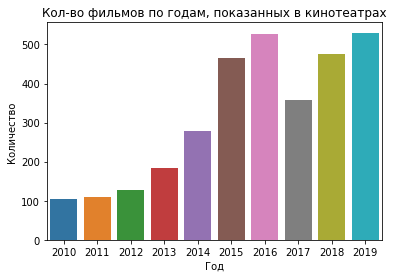

In [66]:
sns.barplot(x='show_start_year', y='films_in_cinema_count', data=t);
plt.title('Кол-во фильмов по годам, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Количество');

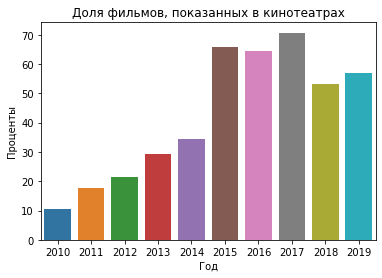

In [67]:
sns.barplot(x='show_start_year', y='cinema_part', data=t);
plt.title('Доля фильмов, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Проценты');

In [68]:
t.corr()

,show_start_year,films_in_cinema_count,cinema_part
show_start_year,1.00,0.91,0.87
films_in_cinema_count,0.91,1.00,0.90
cinema_part,0.87,0.90,1.00


# Вывод

Данные неоднородны. В данной выборке меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля варьируется от 10 до 34 процентов. В связи с этим нельзя говорить о том, что в эти годы было меньше всего кинопоказов. Самый большое количество кинопоказов в кинотеатрах в 2019, хотя доля этих фильмов за этот год в нашей выборке не самая большая в сравнение с другими годами.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [69]:
t = data.groupby('show_start_year')['box_office'].agg('sum')

In [70]:
t

show_start_year
2010        2,428,654.00
2011       14,102,765.00
2012        6,955,423.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2017   48,563,707,217.51
2018   49,668,403,134.32
2019   48,425,708,779.59
Name: box_office, dtype: float64

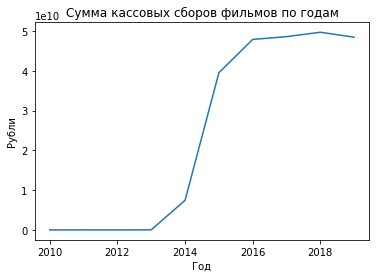

In [71]:
sns.lineplot(data=t)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

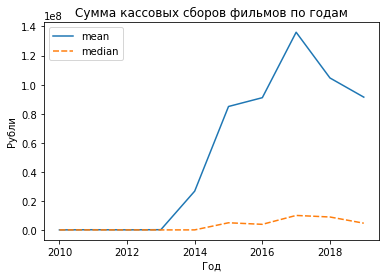

In [72]:
sns.lineplot(data=data.groupby('show_start_year')['box_office'].agg(['mean', 'median']))
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

# Вывод

 Опять же, смотря, как считать. Если нужно учитывать в принципе сумму сборов по годам, то максимум приходится на 2018 год. Года с 2010 по 2014 в расчет не берем, так как по ним меньше всего данных, поэтому минимум приходится на 2015 год



- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [73]:
t = data.groupby('show_start_year')['box_office'].agg(['mean', 'median'])


In [74]:
t

,mean,median
show_start_year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


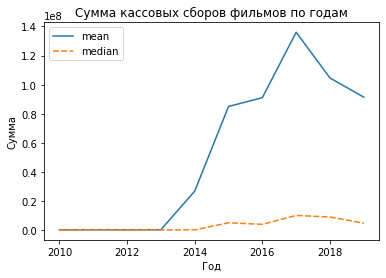

In [75]:
sns.lineplot(data=t)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Сумма');
plt.show()

# Вывод

Видим, что для сборов очень большой разброс данных, это видно из разницы между средней и медианой. Это означает, что в данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Для кино это нормально. В среднем, самый прибыльный "кассовый" год был 2017. Это видно и по медиане, и по средней.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [76]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [77]:
data.query('2015 <= show_start_year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории     809077425.970
«18+» - запрещено для детей              40759615572.120
«6+» - для детей старше 6 лет            55798610799.680
«12+» - для детей старше 12 лет          60619446628.330
«16+» - для детей старше 16 лет          76034733643.630
Name: box_office, dtype: float64

В период с 2015 по 2019 год больше всего кассовых сборов у фильмов 16+

In [78]:
t = data.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()

In [79]:
t

,show_start_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379054578.370
1,2015,«12+» - для детей старше 12 лет,13616082008.910
2,2015,«16+» - для детей старше 16 лет,11368120870.270
3,2015,«18+» - запрещено для детей,5432308367.440
4,2015,«6+» - для детей старше 6 лет,8701799371.410
5,2016,«0+» - для любой зрительской аудитории,150228848.670
6,2016,«12+» - для детей старше 12 лет,12204446524.390
7,2016,«16+» - для детей старше 16 лет,16664548541.740
8,2016,«18+» - запрещено для детей,6793929818.870
9,2016,«6+» - для детей старше 6 лет,12053146008.240


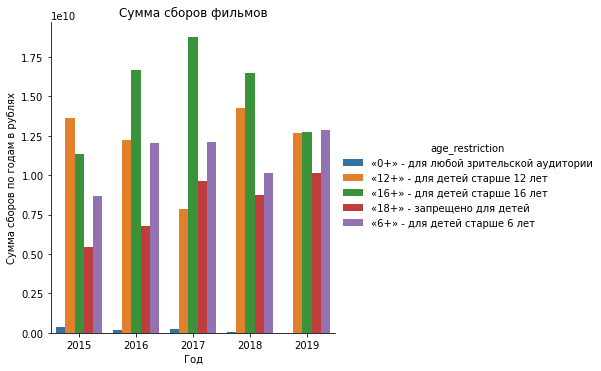

In [80]:
fg = sns.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=t, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');


По графику почти во все годы лидирует по сборам кино 16+, в 2015 в лидерах кино 12+, а в 2019 - 6+

# Вывод

Больше всего денег собрало кино 16+, но лидирует такие киноленты не во все года.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [81]:
t= data[data['budget'].isna() == False].copy()

In [82]:
t

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма,мелодрама",365353.600,2013,А.Атанесян,драма,0.334
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,NaN,28140.000,2014,А.Якимчук,NaN,0.700
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия,фантастика",19957031.500,2013,Р.Давлетьяров,комедия,0.613
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,2014,М.Угаров,драма,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.000,400000000.000,980000000.000,Фонд кино,6.000,"история,биография,драма",717703185.530,2019,А.Кравчук,история,0.510
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.000,0.000,190000000.000,Фонд кино,6.700,"мультфильм,приключения,семейный",501069235.000,2019,Д.Шмидт,мультфильм,0.526
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.000,400000000.000,944000000.000,Фонд кино,5.700,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.530
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,30000000.000,46154000.000,Министерство культуры,5.900,драма,NaN,2019,И.Северов,драма,0.650


Создадим столбец с суммой гос. поддержки

In [83]:
t['total_support'] = t['refundable_support'] + t['nonrefundable_support']

А также добавим столбец payback с разностью между сборами и бюджетом.

In [84]:
t['payback'] = t['box_office'] - t['budget']

In [85]:
t.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback
count,332.000,332.000,332.000,332.000,314.000,318.000,332.000,332.000,332.000,318.000
mean,111593819.096,11864457.831,48980988.892,131422395.795,6.001,132432420.046,2016.720,0.542,60845446.723,425697.962
std,5703031.322,24916555.264,59980117.923,187148242.667,1.124,334837856.986,1.641,0.197,72755459.467,315910432.271
min,111000115.000,0.000,0.000,6000000.000,1.000,1550.000,2013.000,0.044,3000000.000,-1971477243.410
25%,111004891.500,0.000,25000000.000,45524799.500,5.300,1236675.500,2015.000,0.385,25333750.000,-70694429.750
50%,111010367.000,0.000,30000000.000,71196901.500,6.200,15720067.715,2017.000,0.614,35000000.000,-40680816.250
75%,111017815.750,15000000.000,40375000.000,150000000.000,6.700,106373008.273,2018.000,0.661,60000000.000,-2362182.185
max,214010116.000,180000000.000,400000000.000,2305074303.000,8.500,3073568690.790,2019.000,1.000,500000000.000,2913568690.790


Видим, что соотношение гос. поддержки к бюджету в среднем 55%. То есть, в среднем половина бюджета - гос. поддержка. Также интересно, что "в среднем" фильмы имеют чистую прибыль в 425 тыс. рублей, но по таблице больше 75% фильмов убыточно. Об этом говорит отрицательное значение квантиле 75. Такой огромный разброс говорит о том, что в данных есть хиты, которые бьют рекорды по сборам.

 

In [86]:

t.groupby('show_start_year')['total_support'].count()

show_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

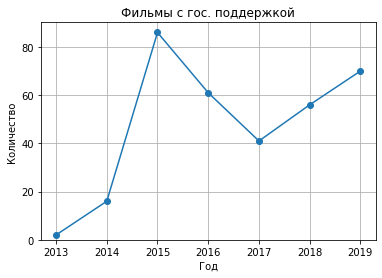

In [87]:
t.groupby('show_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-');
plt.title('Фильмы с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество');

За 2013 и 2014 данных мало. Эти года не будем учитывать при анализе.

In [88]:
t = t[t['show_start_year'] > 2014]

Сколько вообще выделялось денег за каждый год.

In [89]:
t.groupby('show_start_year')['total_support'].sum()

show_start_year
2015   3656241459.000
2016   4303155482.000
2017   3183971662.000
2018   3446969465.000
2019   4904000000.000
Name: total_support, dtype: float64

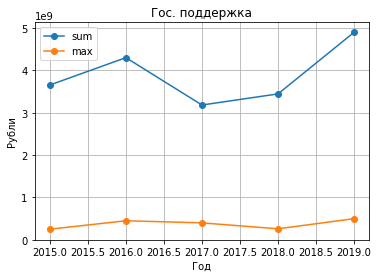

In [90]:
t.groupby('show_start_year')['total_support'].agg(
    ['sum', 'max']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

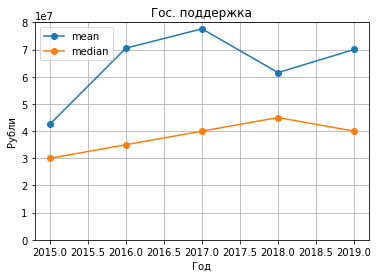

In [91]:
t.groupby('show_start_year')['total_support'].agg(
    ['mean', 'median']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

Соотнесем с рейтингом

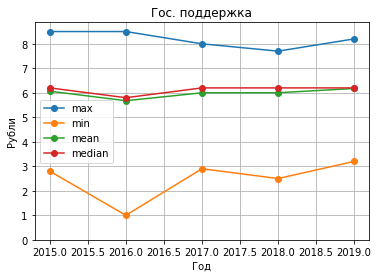

In [92]:
t.groupby('show_start_year')['ratings'].agg(
    ['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-')
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

Если смотреть по медиане рейтинга, то 2016 год был самым худшим. Медиана оценки в этом году (2016) около 1 балла (Ужас!). Если смотреть на среднее арифметическое, то здесь тоже на графике "провал" по сравнению с остальными годами. "В среднем" по остальным годам особых изменений в рейтинге нет. Больше всего поддержки было в 2019 году, а меньше всего в 2017 году. Картина с самым высоким рейтингом выходила в 2016 году. Тот же год был второй по сумме поддержки. Если смотреть среднюю сумму поддержки на каждый фильм, то в 2017 году была самая большая сумма на фильм, а по медиане в 2018 году.

In [93]:
t.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback
puNumber,1.000,0.007,-0.031,-0.019,0.039,0.045,-0.028,0.013,-0.023,-0.013
refundable_support,0.007,1.000,0.361,0.655,0.012,0.308,0.064,0.009,0.640,-0.046
nonrefundable_support,-0.031,0.361,1.000,0.619,0.145,0.457,0.107,0.139,0.948,0.141
budget,-0.019,0.655,0.619,1.000,0.104,0.373,0.156,-0.281,0.735,-0.189
ratings,0.039,0.012,0.145,0.104,1.000,0.161,0.061,-0.051,0.123,0.100
box_office,0.045,0.308,0.457,0.373,0.161,1.000,0.106,-0.080,0.489,0.841
show_start_year,-0.028,0.064,0.107,0.156,0.061,0.106,1.000,-0.106,0.110,0.018
ratio_help_to_budget,0.013,0.009,0.139,-0.281,-0.051,-0.080,-0.106,1.000,0.117,0.089
total_support,-0.023,0.640,0.948,0.735,0.123,0.489,0.110,0.117,1.000,0.101
payback,-0.013,-0.046,0.141,-0.189,0.100,0.841,0.018,0.089,0.101,1.000


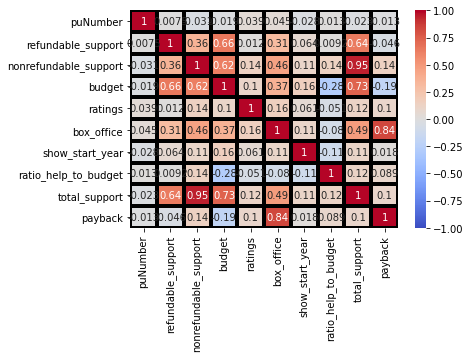

In [94]:
sns.heatmap(
    t.corr(), annot = True, vmin=-1, vmax=1,
    center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',
);

По табличке корреляции можно увидеть, что с поддержкой растет и бюджет ("очевидно же"). А вот на рейтинг сумма поддержки особо не влияет.

Еще можно построить диаграмму рассеяния в зависимости суммы поддержки от рейтинга.

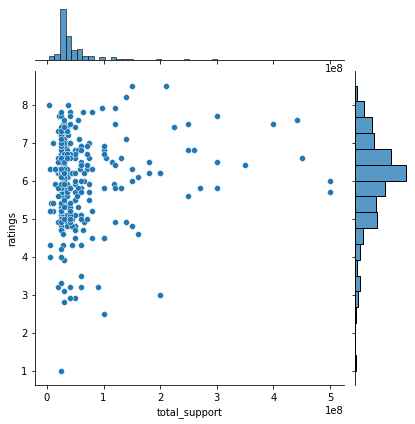

In [95]:
sns.jointplot(data=t, x='total_support', y='ratings', kind='scatter');

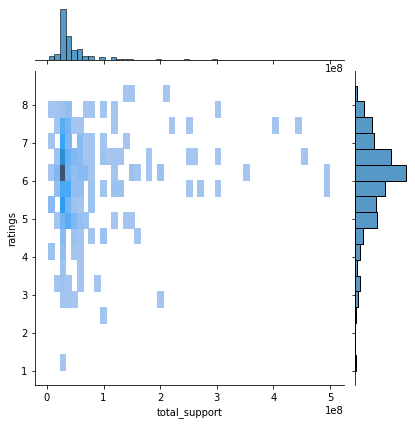

In [96]:
sns.jointplot(data=t, x='total_support', y='ratings', kind='hist');

В выборке преобладают картины с поддержкой до 100 млн рублей. И, в среднем, видим, что хотя бы картины с суммой поддержки больше 200 млн рублей не опускаются в рейтинге ниже 5 баллов (достижение фонда кино). Но и среди самых дорогих фильмов нет тех, которые бы были оценены больше 8 баллов.

Такую же диаграмму можно сделать и в зависимости от окупаемости

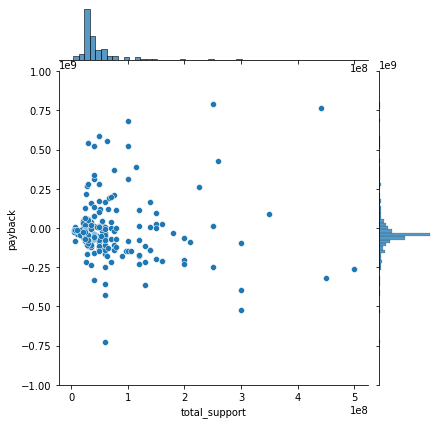

In [97]:
sns.jointplot(data=t, x='total_support', y='payback', kind='scatter');
plt.ylim(-1000000000, 1000000000);

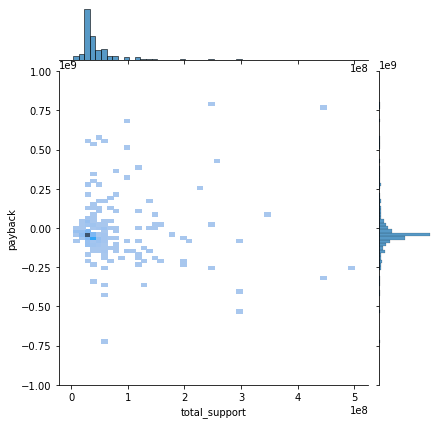

In [98]:
sns.jointplot(data=t, x='total_support', y='payback', kind='hist');
plt.ylim(-1000000000, 1000000000);

По этим графикам видим, что большая часть картин все же не окупается.

Еще можем посмотреть, какие жанры фильмов больше всего поддерживаются, и, какие с самый высокой средней оценкой.

In [99]:
table = t.groupby('genre_first')[['total_support', 'ratings']].agg(['count', 'sum', 'mean','median'])

In [100]:
table.columns = ['_'.join(col).strip() for col in table.columns.values]

Возьмем топ-10 по кол-ву картин

In [101]:
table = table.sort_values(by='total_support_count', ascending=False).head(10)

In [102]:
table

,total_support_count,total_support_sum,total_support_mean,total_support_median,ratings_count,ratings_sum,ratings_mean,ratings_median
genre_first,,,,,,,,
драма,85,5018904333.000,59045933.329,30000000.000,84,536.800,6.390,6.450
комедия,71,3052435000.000,42992042.254,35000000.000,71,391.100,5.508,5.800
мультфильм,30,2391520000.000,79717333.333,65000000.000,30,173.300,5.777,6.150
триллер,15,769645285.000,51309685.667,40000000.000,15,85.600,5.707,5.600
мелодрама,13,350000000.000,26923076.923,28000000.000,13,75.900,5.838,5.900
фэнтези,11,1032900000.000,93900000.000,34000000.000,11,67.000,6.091,6.800
ужасы,10,355000000.000,35500000.000,30000000.000,10,52.000,5.200,5.100
фантастика,10,1381000000.000,138100000.000,85000000.000,9,51.600,5.733,5.700
военный,9,422000866.000,46888985.111,45000000.000,9,58.200,6.467,6.400


В топ-3 по сумме финансирования вошли: драма, комедия, мультфильм. Из этих трех лучшие оценки у драм, средняя оценка - 6.4, что считается по меркам "Кинопоиска" - "на троечку".

In [103]:
new_table = t.groupby('genre_first')['total_support'].agg(['count', 'mean', 'median']).reset_index(
).sort_values(by='count', ascending=False).head(10)

In [104]:
new_table.sort_values(by='mean', ascending=False)

,genre_first,count,mean,median
18,фантастика,10,138100000.000,85000000.000
12,приключения,7,99428571.429,40000000.000
19,фэнтези,11,93900000.000,34000000.000
10,мультфильм,30,79717333.333,65000000.000
5,драма,85,59045933.329,30000000.000
16,триллер,15,51309685.667,40000000.000
2,военный,9,46888985.111,45000000.000
7,комедия,71,42992042.254,35000000.000
17,ужасы,10,35500000.000,30000000.000
9,мелодрама,13,26923076.923,28000000.000


In [105]:
new_table.sort_values(by='median', ascending=False)

,genre_first,count,mean,median
18,фантастика,10,138100000.000,85000000.000
10,мультфильм,30,79717333.333,65000000.000
2,военный,9,46888985.111,45000000.000
16,триллер,15,51309685.667,40000000.000
12,приключения,7,99428571.429,40000000.000
7,комедия,71,42992042.254,35000000.000
19,фэнтези,11,93900000.000,34000000.000
5,драма,85,59045933.329,30000000.000
17,ужасы,10,35500000.000,30000000.000
9,мелодрама,13,26923076.923,28000000.000


In [106]:
table = t.groupby('director_first')['total_support', 'payback', 'ratings'].agg(['count', 'sum', 'mean','median'])

/tmp/ipykernel_96/3113694131.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table = t.groupby('director_first')['total_support', 'payback', 'ratings'].agg(['count', 'sum', 'mean','median'])


In [107]:
table.columns = ['_'.join(col).strip() for col in table.columns.values]


In [108]:
table.sort_values(by='total_support_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
director_first,,,,,,,,,,,,
Ф.Бондарчук,2,750000000.000,375000000.000,375000000.000,1,788321489.000,788321489.000,788321489.000,2,11.300,5.650,5.650
Н.Хомерики,3,660000000.000,220000000.000,300000000.000,3,-325561715.770,-108520571.923,-92930337.200,3,18.100,6.033,5.800
А.Кравчук,1,500000000.000,500000000.000,500000000.000,1,-262296814.470,-262296814.470,-262296814.470,1,6.000,6.000,6.000
А.Мизгирев,1,450000000.000,450000000.000,450000000.000,1,-319915396.400,-319915396.400,-319915396.400,1,6.600,6.600,6.600
Н.Лебедев,1,442104482.000,442104482.000,442104482.000,1,766971523.000,766971523.000,766971523.000,1,7.600,7.600,7.600
А.Мегердичев,1,400000000.000,400000000.000,400000000.000,1,2189493953.000,2189493953.000,2189493953.000,1,7.500,7.500,7.500
Р.Давлетьяров,4,352000000.000,88000000.000,86000000.000,4,-315100846.060,-78775211.515,-100033476.030,4,28.600,7.150,7.100
Д.Дьяченко,4,351000000.000,87750000.000,83000000.000,4,1624203322.120,406050830.530,154837534.750,4,22.600,5.650,5.450
И.Шурховецкий,1,350000000.000,350000000.000,350000000.000,1,90392336.000,90392336.000,90392336.000,1,6.400,6.400,6.400


Больше всего поддержки получил Федор Бондарчук. При гос. поддержке он снял две кинокартины. Но данные о выручке есть только по одной. Это фильм "Притяжение". Чистая прибыль составила 788 млн рублей. Хотя рейтинг совсем не высокий - чуть меньше 6 балов. Второй по "вливаниям" гос. поддержки - Николай Хомерики. В целом, его картины сильно убыточны (может, из-за "освоенного" бюджета?), хотя, в среднем, рейтинг будет повыше, чем у фильмов Бондарчука. Но есть в этом списке особый претендент - это Николай Лебедев. Его фильм "Экипаж" и заработал денег, и имеет вполне хорошую оценку (7.6). Попробуем отсортировать теперь по выручке

In [109]:
table.sort_values(by='payback_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
director_first,,,,,,,,,,,,
К.Шипенко,2,285000000.000,142500000.000,142500000.000,2,3172514510.790,1586257255.395,1586257255.395,2,14.200,7.100,7.100
А.Мегердичев,1,400000000.000,400000000.000,400000000.000,1,2189493953.000,2189493953.000,2189493953.000,1,7.500,7.500,7.500
А.Сидоров,1,180000000.000,180000000.000,180000000.000,1,1707969287.520,1707969287.520,1707969287.520,1,6.500,6.500,6.500
Д.Дьяченко,4,351000000.000,87750000.000,83000000.000,4,1624203322.120,406050830.530,154837534.750,4,22.600,5.650,5.450
О.Трофим,1,85000000.000,85000000.000,85000000.000,1,1297146575.890,1297146575.890,1297146575.890,0,0.000,NaN,NaN
Ф.Бондарчук,2,750000000.000,375000000.000,375000000.000,1,788321489.000,788321489.000,788321489.000,2,11.300,5.650,5.650
Н.Лебедев,1,442104482.000,442104482.000,442104482.000,1,766971523.000,766971523.000,766971523.000,1,7.600,7.600,7.600
Д.Шмидт,3,215000000.000,71666666.667,75000000.000,3,698312261.000,232770753.667,311069235.000,3,18.600,6.200,6.200
Д.Киселев,2,350000000.000,175000000.000,175000000.000,2,696959413.000,348479706.500,348479706.500,2,13.300,6.650,6.650


В таком списке теперь Бондарчук не в лидерах, но далеко не ушел. На первом месте Клим Шипенко. Его картины "Салют-7" и "Холоп" имеют хорошие оценки (7.4 и 6.8) и заработали больше всех. Также в ТОП-10 ворвался Бекмамбетов на последней строчке. У его "Ёлок" так себе оценки, но зато прибыльные (хоть и "последние"). Пора делать выводы.

# Вывод

В мире киноиндустрии не все так однозначно. Фильмы, в среднем, не окупаются, но при этом государственный фонд все равно в прибыли за счет хитов. При этом "хиты" могут иметь "так себе" оценки (средние), но приносить прибыль. Большего всего фильмов при поддержке снято в жанре "драма", на втором месте - "комедия". Самый большая сумма гос. поддержки была выделена Федору Бондарчуку. Он "не подвел" и снял фильм, который был прибылен и даже попал в топ-10 по прибыли. Самый "денежный" режиссер - Клим Шипенко. Его картины были самыми прибыльными. Кстати, у Шипенко еще есть один фильм - "Текст", но в выборку он не попал.

### Шаг 5. Напишите общий вывод

# Общий вывод

В датасете есть дубликаты по названию фильма, но у этих кинокартин разные номера прокатных удостоверений, поэтому оставили данные без доп. обработки; Также есть фильмы с одинаковыми номерами прокатных удостоверений, но, проверив, такие фильмы на официальном - подтвердили, что все так и есть. Видимо, под одним номером может быть в прокате несколько фильмов. В бюджете фильмов были нулевые значения. В таких строках нулевой бюджет заменили на сумму поддержки. Для анализа добавили дополнительные столбцы с годом старта показа картины, первого в списке режиссера, и первого в списке жанра, а также отношение суммы поддержки к бюджету. Больше всего фильмов было показано в кинотеатре в 2019 году, чуть меньше - в 2016. Минимальная сумма сборов была в 2015, максимальная в 2018. Наибольшая "средняя" сумма сборов приходится на 2017 год. Больше всего сборов у фильмов 16+. Если смотреть по годам, то в 2017 году кино 16+ принесло больше всех денег, но в 2015 более "кассовое" кино было 12+. Больше всего было денег выделено гос. фондом в 2019 году, чуть меньше - в 2016. Но в среднем по медиане самый большой бюджет на каждый фильм приходится на 2018 год. Самые худшие (по рейтингу) фильмы были в прокате в 2016 году. В остальные годы средняя оценка была около 6 баллов. На рейтинг фильма увеличение суммы поддержки особо не влияет. Несмотря на убыточность более 75% фильмов в данной выборке, за счет хитов киноиндустрия окупается. Больше всего фильмов с суммой поддержки до 100 млн рублей, такие фильмы, в основном, с рейтингом чуть больше 6 балов. При этом нет плохих фильмов (с оценкой ниже 5 балов) с суммой поддержки больше 200 млн рублей. По количеству и по сумме поддержки на первом месте жанр "драма", на втором "комедия". Самую большую сумму поддержки получил Федор Бондарчук.